In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import datasets

In [4]:
df_train = pd.read_csv('datasets/Titanic_train.csv')
df_test = pd.read_csv('datasets/Titanic_test.csv')
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Handle null values

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# dropping 'Cabin' and 'Embarked' columns as these columns not helping in prediction
df_train.drop(columns=['Name','Sex','Ticket','Cabin','Embarked'], inplace=True) 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [10]:
df_train.duplicated().sum()

0

#### Vizualization

In [12]:
variables = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

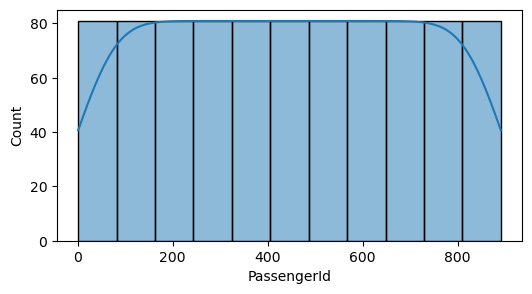

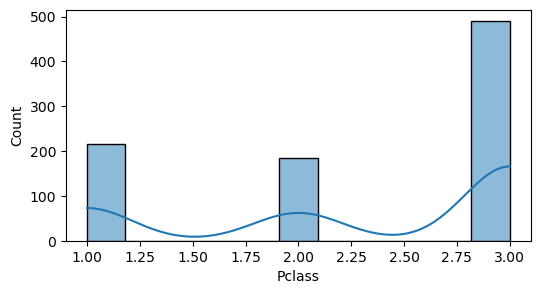

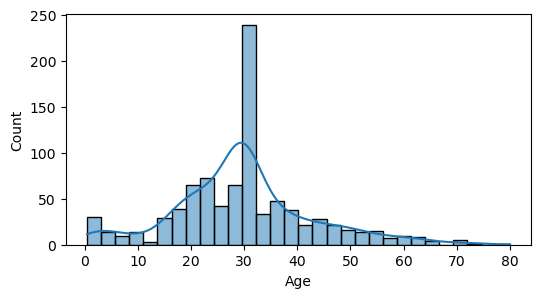

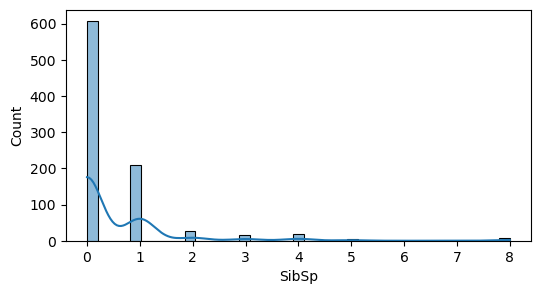

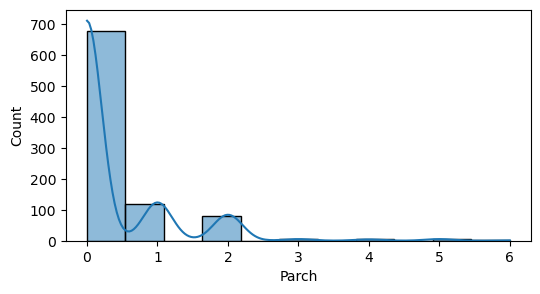

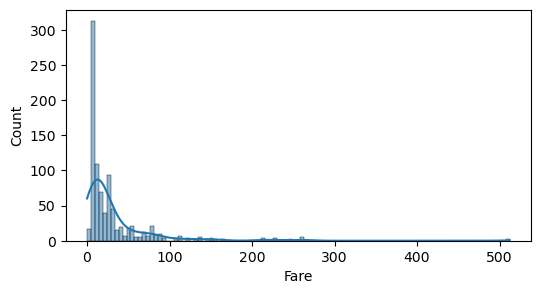

In [13]:
for i in variables:
    plt.figure(figsize=(6,3))
    sb.histplot(df_train[i], kde=True)
    plt.show()

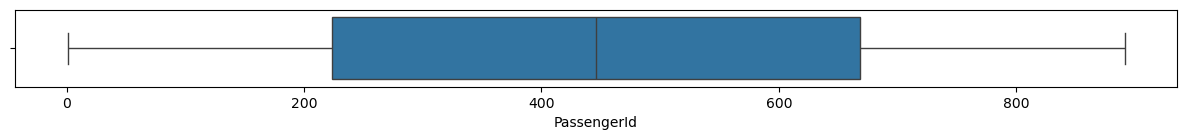

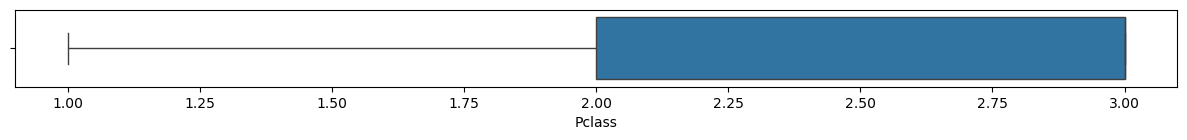

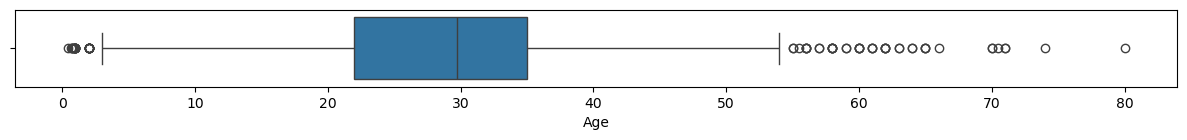

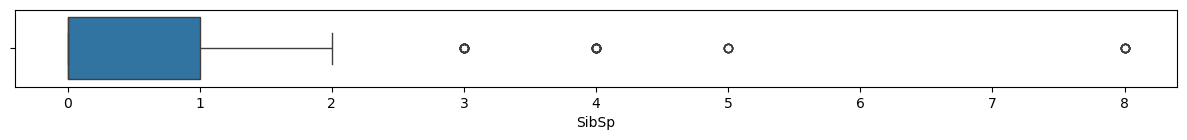

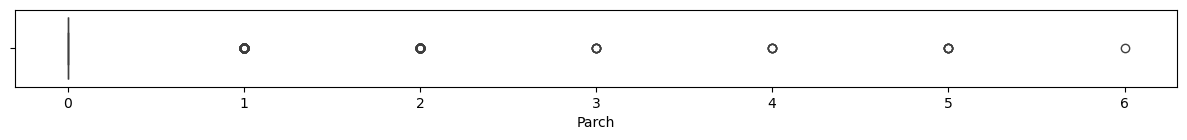

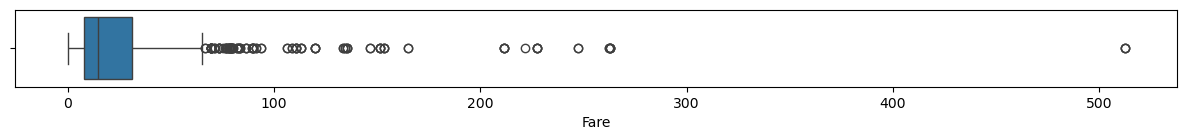

In [14]:
for i in variables:
    plt.figure(figsize=(15,1))
    sb.boxplot(df_train[i],orient='h')
    plt.show()

In [15]:
def get_limits(var):
    Q1 = np.percentile(df_train[var],25)
    Q3 = np.percentile(df_train[var],75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)      
    return lower_limit, upper_limit

In [16]:
def check_outliers(var, LL, UL):
    #print(f'{var} :: {LL} :: {UL} >>>> {df_train[ (df_train[var]>UL) | (df_train[var]<LL) ].shape}')
    if df_train[ (df_train[var]>UL) | (df_train[var]<LL) ].shape[0] > 0 :   
        return True
    else:
        return False  

In [17]:
outlier_variables = ['Age', 'SibSp', 'Parch', 'Fare']
for var in outlier_variables: 
    LL, UL = get_limits(var)  
    flag = check_outliers(var, LL, UL)
    if flag == True: 
        df_train.loc[ df_train[var]>UL, var ] = UL  
        df_train.loc[ df_train[var]<LL, var ] = LL 

Age :: 2.5 :: 54.5 >>>> (66, 7)
SibSp :: -1.5 :: 2.5 >>>> (46, 7)
Parch :: 0.0 :: 0.0 >>>> (213, 7)
Fare :: -26.724 :: 65.6344 >>>> (116, 7)


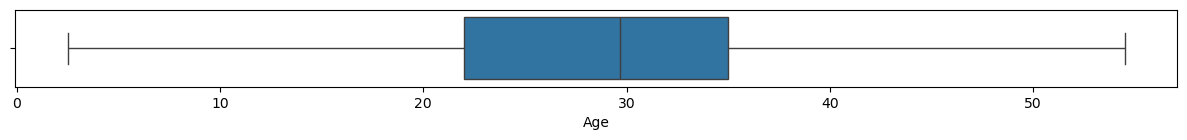

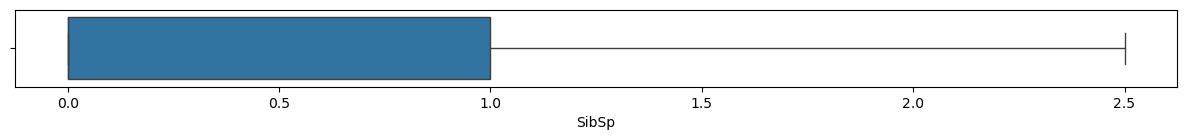

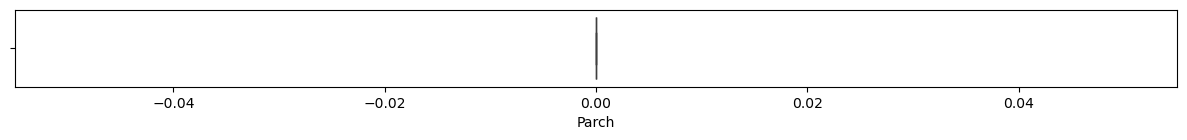

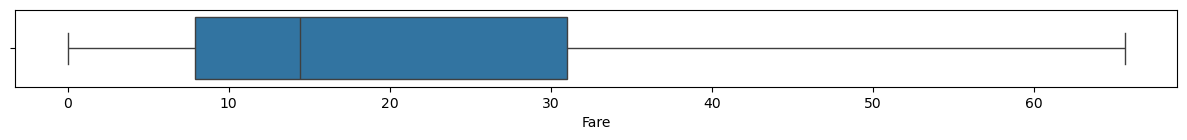

In [18]:
for i in outlier_variables:
    plt.figure(figsize=(15,1))
    sb.boxplot(df_train[i],orient='h')
    plt.show()

In [19]:
df_train.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


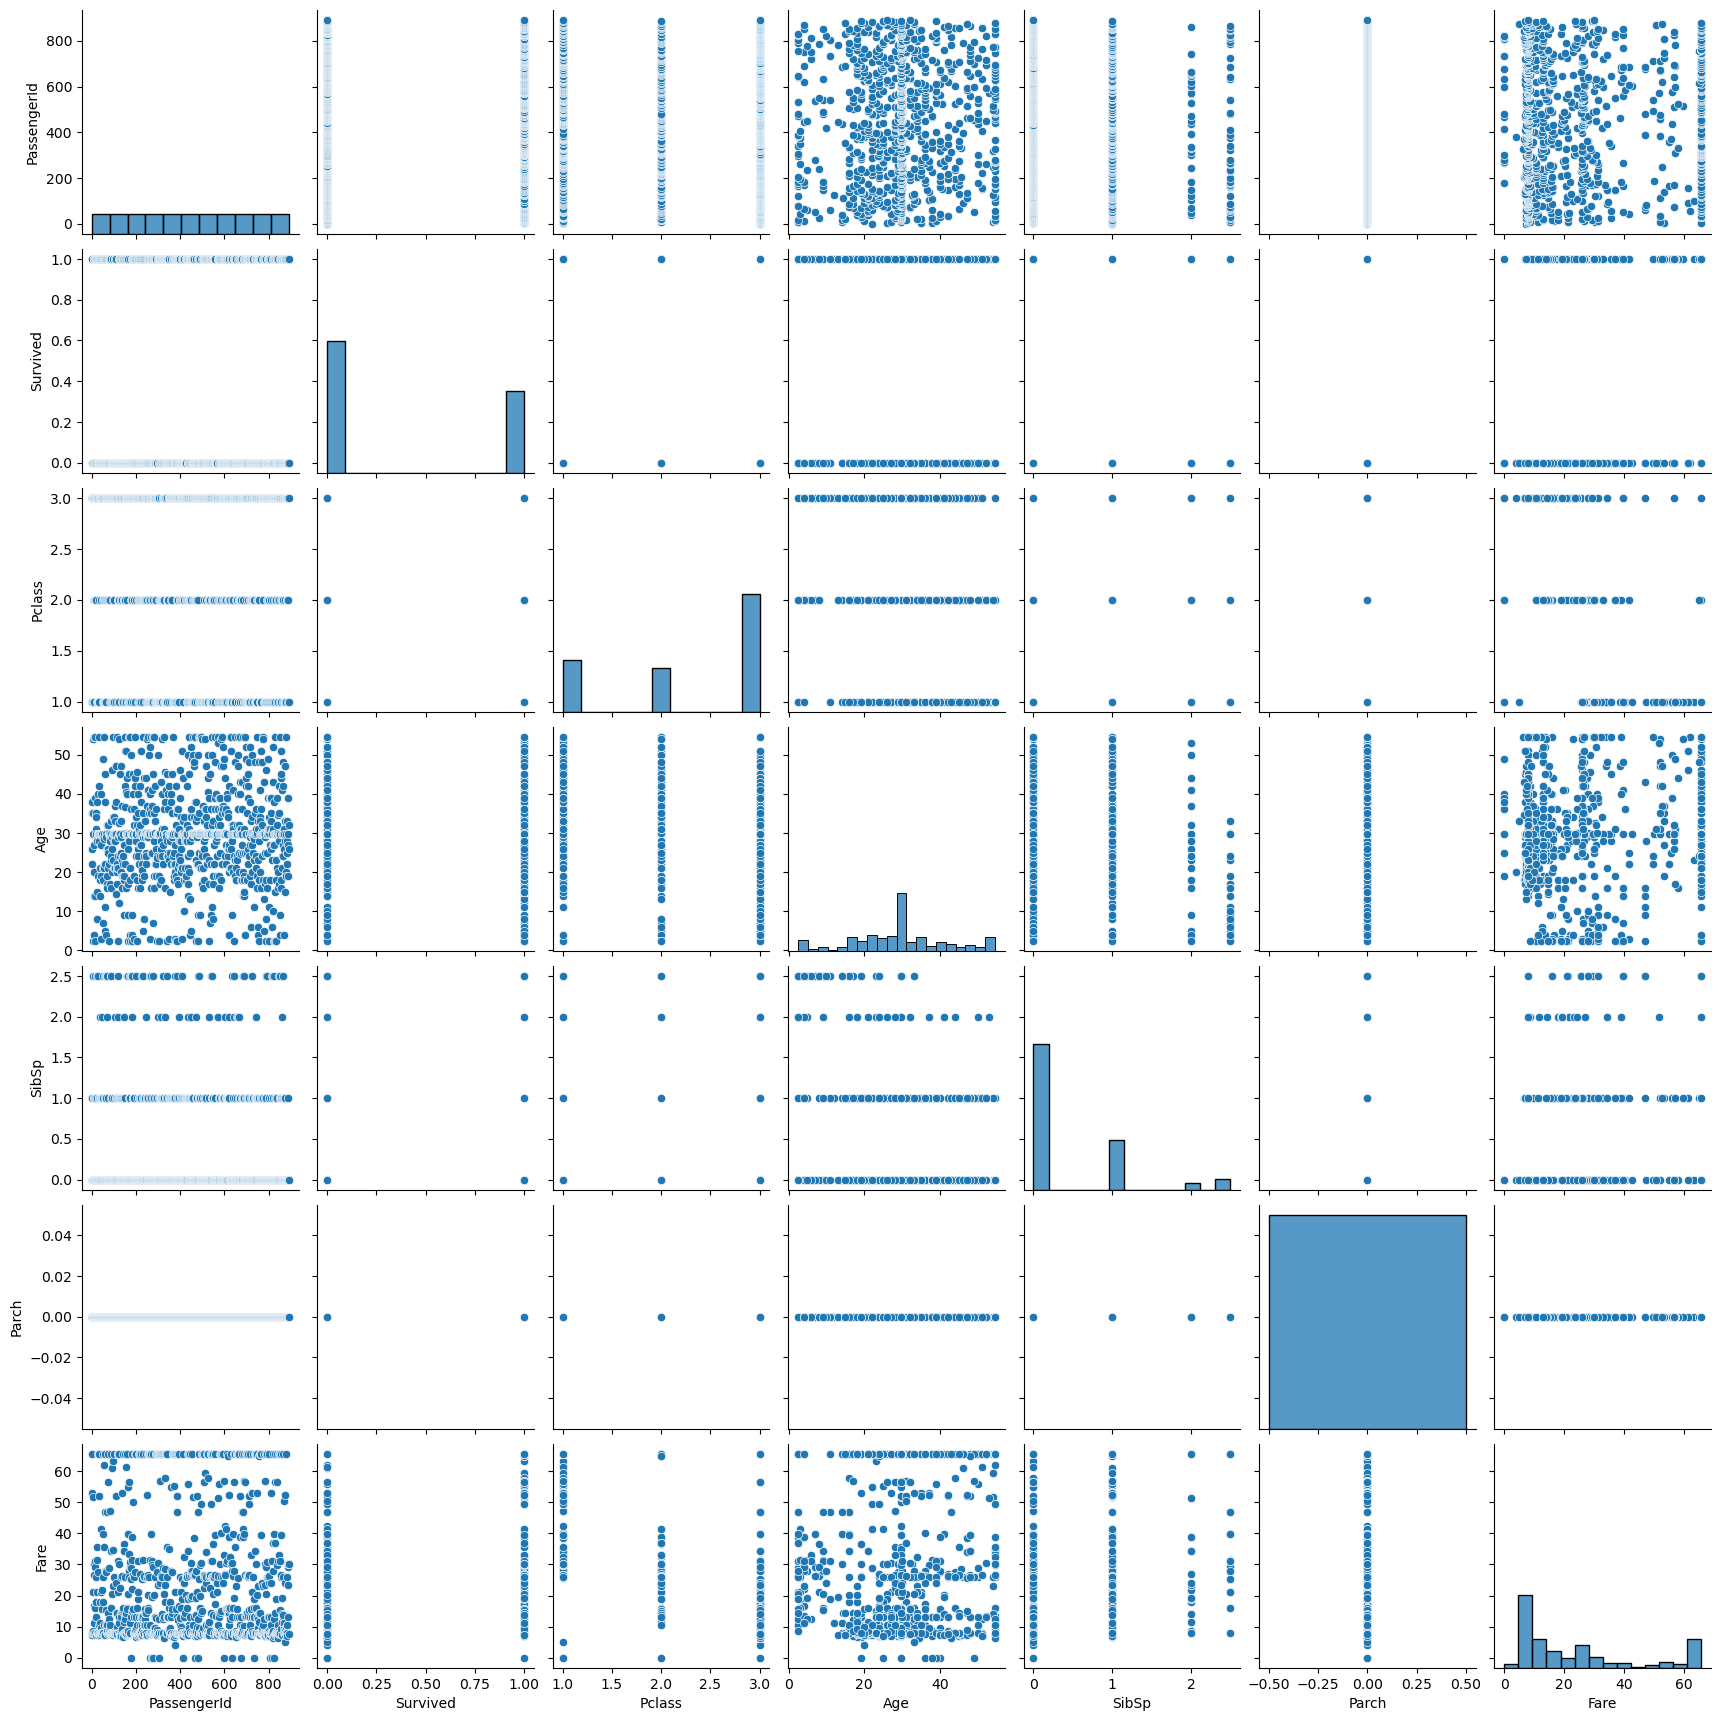

In [20]:
sb.pairplot(df_train)
plt.show()

In [21]:
df_train.drop(columns=['Parch'],inplace=True)


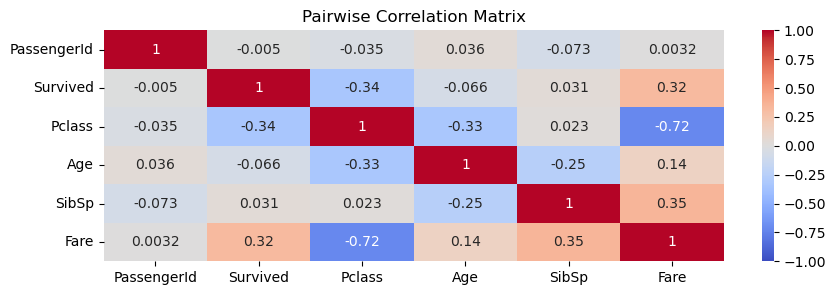

In [22]:
corr_matrix = df_train.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(10, 3))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pairwise Correlation Matrix')
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#df_train.head(3)
X = df_train.drop(columns=['Survived'])
# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
df_train_vif = pd.DataFrame()
df_train_vif['Feature'] = X.columns
df_train_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(df_train_vif)

       Feature        VIF
0        const  52.135127
1  PassengerId   1.006566
2       Pclass   2.623847
3          Age   1.203918
4        SibSp   1.451027
5         Fare   2.824572


In [24]:
X = X.iloc[:,1:]
Y = df_train.iloc[:,1:2]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.33, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [65]:
print("Coefficients:", LR_model.coef_)
print("Intercept:", LR_model.intercept_)

Coefficients: [[-1.27333791e-04 -7.10936254e-01 -3.40633310e-02 -2.30419748e-01
   1.48602533e-02]]
Intercept: [1.89103425]


In [27]:
yhat_train = LR_model.predict(x_train)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       374
           1       0.64      0.40      0.49       222

    accuracy                           0.69       596
   macro avg       0.68      0.63      0.64       596
weighted avg       0.69      0.69      0.67       596



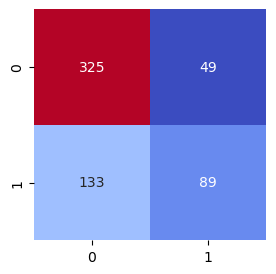

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_train,yhat_train)
sb.heatmap(cm, cmap='coolwarm', annot=True, fmt='d', cbar=False)
print(classification_report(y_train,yhat_train))
plt.show()

In [59]:
def plot_roc(y,yhat):
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.ylabel('False Positive Rate(FPR)')
    plt.xlabel('True Positive Rate(TPR)')
    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y_train, yhat_train)
    auc
    plt.plot(fpr,tpr)    
    plt.show()

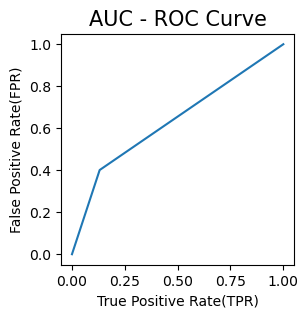

In [61]:
plot_roc(y_train,yhat_train)

In [55]:
yhat_test = LR_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       175
           1       0.75      0.48      0.59       120

    accuracy                           0.73       295
   macro avg       0.73      0.69      0.69       295
weighted avg       0.73      0.73      0.71       295



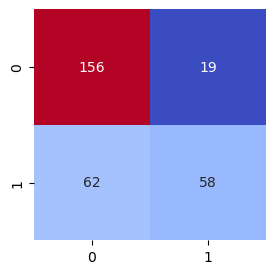

In [57]:
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,yhat_test)
sb.heatmap(cm, cmap='coolwarm', annot=True, fmt='d', cbar=False)
print(classification_report(y_test,yhat_test))
plt.show()

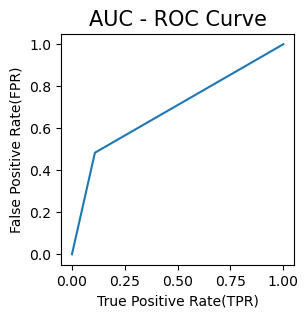

In [63]:
plot_roc(y_test,yhat_test)

In [69]:

# bagging ---> bagging with logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier  # BaggingRegressor
bag = BaggingClassifier(estimator=LogisticRegression(),max_samples=0.6, max_features=0.7,n_estimators=300,random_state=100)

bag.fit(x_train,y_train)

Y_pred_train = bag.predict(x_train)
Y_pred_test = bag.predict(x_test)

from sklearn.metrics import accuracy_score
training_accuracy  = accuracy_score(y_train,Y_pred_train)
test_accuracy  = accuracy_score(y_test,Y_pred_test)

import numpy as np
print("bagging Log: training accuracy:", np.round(training_accuracy,2))
print("bagging Log: test accuracy:", np.round(test_accuracy,2))

bagging Log: training accuracy: 0.68
bagging Log: test accuracy: 0.73


- As the predictor increases, the log-odds and probability of the positive class increase.


### Q1. What is the difference between precision and recall?

<u><b>Precision:</b></u> Out of all predicted values, how many are actually correct?

    Precision = True Positives/ (True Positive + False Positive)

<u><b>Recall:</b></u> Out of all actual positive values, how many are correctly identified

    Recall = True Positives/ (True Positive + False Negative) 

### Q2. What is cross-validation, and why is it important in binary classification?

##### Instead of training and testing model on single split of data, cross-validation divides the dataset into multiple parts and rotates the part of dataset for testing

CV reduces overfitting and gives better result. It also allowes hyperparameter tuning which helps compare best parameters and models